<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:0rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2024 @ Author</i></b><br/>
        <i>Author：
            <b>
            <a href="mailto:your_address@email.com">王江海 📨 </a>
            </b>
        </i>
        <br/>
        <i>Date：2024-03-24</i><br/>
        <i>License：</a><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">CC BY-NC-SA 4.0 International</a></i><br/>
</div>

> **相关链接**：
> 
> - [《计算材料学》（分子动力学）算法原理](https://nb.bohrium.dp.tech/detail/52743861357)
> - [Python Implementation: ***Lennard-Jones Potential***](https://nb.bohrium.dp.tech/detail/35387325971)
> - [Python Implementation: ***Optimization Algorithms for Molecular Dynamics***](https://nb.bohrium.dp.tech/detail/36773325971)
> - [Python Implementation: ***Integration Algorithms for Molecular Dynamics***](https://nb.bohrium.dp.tech/detail/49396512168)

# 1. Flower❀ & Butterfly🦋

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Petal
def petal(radius, angle_rad):
    arc = np.linspace(-angle_rad / 2, angle_rad / 2, 100)

    x_arc = radius * np.cos(arc)
    y_arc = radius * np.sin(arc)

    x_petal = np.concatenate((x_arc - radius * np.cos(angle_rad / 2), -x_arc[::-1] + radius * np.cos(angle_rad / 2)))
    y_petal = np.concatenate((y_arc - radius * np.sin(angle_rad / 2), y_arc[::-1] - radius * np.sin(angle_rad / 2)))
    return x_petal, y_petal


def rotate(x, y, angle_rad):
    x_rot = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_rot = x * np.sin(angle_rad) + y * np.cos(angle_rad)
    return x_rot, y_rot


# Butterfly
def butterfly(theta):
    x = np.sin(theta) * (np.exp(np.cos(theta)) - 2 * np.cos(4 * theta) - np.sin(theta / 12) ** 5)
    y = np.cos(theta) * (np.exp(np.cos(theta)) - 2 * np.cos(4 * theta) - np.sin(theta / 12) ** 5)
    return x, y


# Color of the flower
color_set = ["purple", "fuchsia", "deeppink", "lightpink", "m", "hotpink"]


def draw(radius, angle_deg, scale_factor, sampling_points):
    angle_rad = np.deg2rad(angle_deg)
    fig, ax = plt.subplots()

    # Petal
    x_petal, y_petal = petal(radius, angle_rad)

    # Flower
    for i in range(6):
        rotation_angle = i * (2 * np.pi / 6)
        x_petal_rot, y_petal_rot = rotate(x_petal, y_petal, rotation_angle)
        ax.fill(x_petal_rot, y_petal_rot, color=color_set[i])

    # Butterfly
    x, y = butterfly(sampling_points)
    x_scaled = x * scale_factor
    y_scaled = y * scale_factor
    ax.fill(x_scaled, y_scaled, color='orange')
    ax.plot(x_scaled, y_scaled, color='yellow')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.xlim(-2 * radius, 2 * radius)
    plt.ylim(-2 * radius, 2 * radius)
    plt.show()

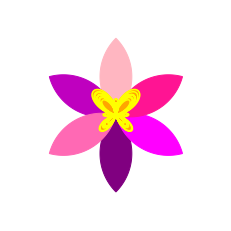

In [3]:
r = 10
theta = 90
scale_factor = 1.2
sampling_points = np.linspace(0, 20 * np.pi, 10000)

# Plot
draw(r, theta, scale_factor, sampling_points)

# 2. Optimization algorithm

---

采用不同的优化算法求解[Rosenbrock函数](https://en.wikipedia.org/wiki/Rosenbrock_function)的极小值。

- 最速下降法
- 共轭梯度法

参考资料：[最速下降法代码实现](https://nb.bohrium.dp.tech/detail/48299512168)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def rosenbrock_gradient(x):
    return np.array([-2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2), 200 *(x[1] - x[0]**2)])

In [6]:
class OptimizationAlgorithm:
    def __init__(self, f, f_grad, max_iters=10000, tol=1e-6, alpha=0.5, beta=0.5):
        self.f = f
        self.f_grad = f_grad
        self.max_iters = max_iters
        self.tol = tol
        self.alpha = alpha
        self.beta = beta

    def backtrack_line_search(self, x, descent_dir, alpha=None, beta=None):
        if alpha is None:
            alpha = self.alpha
        else:
            alpha = float(alpha)

        if beta is None:
            beta = self.beta
        else:
            beta = float(beta)

        t = 1.0
        while self.f(x + t*descent_dir) > self.f(x) + self.alpha*t*np.dot(self.f_grad(x), descent_dir):
            t *= self.beta
        return t

    def steepest_descent(self, init_x, max_iters=None, tol=None):
        if max_iters is None:
            max_iters = self.max_iters
        else:
            max_iters = int(max_iters)

        if tol is None:
            tol = self.tol
        else:
            tol = int(tol)

        x = init_x
        path = [x]
        print("Iteration\t\t\t\tPosition\t\t\tdelta")
        print("------------------------------------------------------------")
        for i in range(max_iters):
            g = -self.f_grad(x)
            d = g
            alpha = self.backtrack_line_search(x, d)
            new_x = x + alpha * d
            if i % 50 == 0:
                position = [x[0], x[1], self.f(x)]
                delta = np.linalg.norm(g)
                print("{}\t\t\t{}\t\t\t{}".format(i, position, delta))
            path.append(new_x)
            if np.linalg.norm(d) < tol:
                break
            x = new_x
        return np.array(path)

    def conjugate_gradient(self, init_x, max_iters=None, tol=None):
        if max_iters is None:
            max_iters = self.max_iters
        else:
            max_iters = int(max_iters)

        if tol is None:
            tol = self.tol
        else:
            tol = int(tol)

        x = init_x
        path = [x]
        print("Iteration\t\t\t\tPosition\t\t\tdelta")
        print("------------------------------------------------------------")
        g = -self.f_grad(x)
        d = g
        for i in range(max_iters):
            alpha = self.backtrack_line_search(x, d)
            new_x = x + alpha * d
            if i % 10 == 0:
                position = [x[0], x[1], self.f(x)]
                delta = np.linalg.norm(g)
                print("{}\t\t\t{}\t\t\t{}".format(i, position, delta))
            path.append(new_x)
            g_next = -self.f_grad(new_x)
            beta = np.dot(g_next, g_next) / np.dot(g, g)
            d = g_next + beta * d
            g = g_next
            if np.linalg.norm(g) < tol:
                break
            x = new_x
        return np.array(path)

In [7]:
# Initial guess and optimization
ini_x = np.array([-0.7, 5])
optimizer = OptimizationAlgorithm(rosenbrock, rosenbrock_gradient)
sd_path = optimizer.steepest_descent(ini_x)
print("\n\n================================================================================\n\n")
cg_path = optimizer.conjugate_gradient(ini_x)

sd_value, cg_value = [], []
for x in sd_path:
    sd_value.append(rosenbrock(x))

for x in cg_path:
    cg_value.append(rosenbrock(x))

sd_value = np.array(sd_value)
cg_value = np.array(cg_value)

Iteration				Position			delta
------------------------------------------------------------
0			[-0.7, 5.0, 2036.9]			1549.0940449178672
50			[-2.0041378109709003, 4.022424818936088, 9.028273792150134]			1.75982754711246
100			[-1.992714616006832, 3.976194378959966, 8.959131610713431]			2.065278705090675
150			[-1.9738538818427394, 3.904931573444536, 8.85160808647827]			2.0427577379098127
200			[-1.9555337137408235, 3.832235342585221, 8.741778231007835]			1.6839720731869392
250			[-1.9413429590548448, 3.7767680843210187, 8.657827559359344]			1.6182602185852686
300			[-1.9260149595479588, 3.715912255004096, 8.565632236333572]			1.5833899292753781
350			[-1.9110878235264042, 3.660007553190739, 8.480439936499604]			1.5535864326918327
400			[-1.8968341685730246, 3.603797479630485, 8.395032666461168]			1.8047747096311697
450			[-1.8821434596771958, 3.5505601259468462, 8.313305643151788]			1.652697531240239
500			[-1.8665204390707968, 3.491831725586059, 8.223232955940999]			1.5979630718567592

In [8]:
print("Algo\t\t\t\tFinal position\t\t\t\tIterations")
print("------------------------------------------------------------------------------------------------------------------------")
print("Steepest Descent\t\t\t\t{}\t\t\t\t{}".format(sd_path[-1], len(sd_path) - 1))
print("Conjugate Gradient\t\t\t\t{}\t\t\t\t{}".format(cg_path[-1], len(cg_path) - 1))

Algo				Final position				Iterations
------------------------------------------------------------------------------------------------------------------------
Steepest Descent				[1.00000108 1.00000215]				3840
Conjugate Gradient				[0.99999966 0.99999931]				269


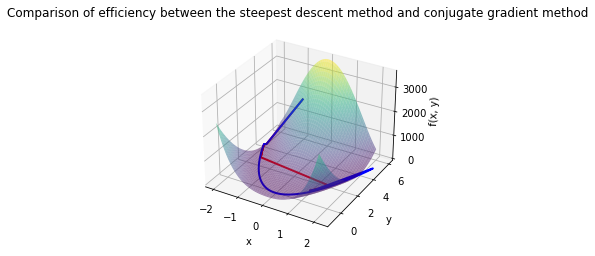

In [9]:
# Contour plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 6, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

ax.plot(sd_path[:, 0], sd_path[:, 1], sd_value, color='red', linewidth=2)
ax.plot(cg_path[:, 0], cg_path[:, 1], cg_value, color='blue', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Comparison of efficiency between the steepest descent method and conjugate gradient method')

plt.show()

# 3. Integration algorithm

---

分子动力学模拟方法通过对物质的**微观运动**进行数值模拟，以研究其**宏观性质**。其核心环节是**积分算法**，该算法基于**牛顿第二定律**预测系统的时间演化轨迹。

**算法核心**：**牛顿第二定律**

$$
F = ma
$$

其中 $F$ 是作用在粒子上的合力， $m$ 是粒子的质量， $a$ 是粒子的加速度。

- **Euler方法**

  最直接的积分方法。给定一个时间步长 $\Delta t$，新的位置通过 $r(t + \Delta t) = r(t) + v(t) \Delta t$ 计算。然后，使用 $F = ma$ 更新速度 $v(t + \Delta t)$。

- **Position Verlet算法**

  通过考虑时间 $t$ 和 $t-\Delta t$ 的两个状态来预测 $t+\Delta t$ 时刻的状态。具有良好的能量守恒特性，常被用于长时间的模拟。

- **Velocity Verlet算法**

  与Verlet算法相似，但它还包括**速度**的更新，使得温度和动量的控制变得更为直接。首先使用当前的力和位置来预测新的速度和位置，然后用新的位置来计算新的力，最后用新的力来修正速度。

- **Leapfrog算法**

  速度和位置的计算“交错”进行。速度在半个时间步长后被计算，并用于计算新的位置，之后使用新的位置再次更新速度。


**时间步长选择**：时间步长 $\Delta t$ 的选择对模拟的准确性至关重要。如果选择得太大，可能会错过系统中的高频振动。**一般而言，时间步长应选择为系统中最高频率振动的周期的十分之一左右。**


总的来说，积分算法是分子动力学预测原子和分子随时间演化的关键工具。合适的积分算法和参数的选择对于得到准确和物理上有意义的模拟结果至关重要。


接下来以一维[**谐振子**](https://en.wikipedia.org/wiki/Harmonic_oscillator)为例，采用不同的积分算法模拟单原子分子在一维势场中的运动。


参考资料：[分子动力学积分算法代码实现](https://nb.bohrium.dp.tech/detail/19755433825)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

- ***Helper function***

In [11]:
def evolution(k, m, dt, x0, v0, T, algo: str, plot=False):
    """
    Visualize the time evolution of position and phase space trajectory.

    This function generates two subplots: one showing the position as a function
    of time, and one showing the phase space trajectory (velocity vs. position).

    Parameters:
    k : spring constant
    m : mass
    dt : time step
    x0 : initial position
    v0 : initial velocity
    T : total time

    Returns: times, positions, velocities
    """
    if algo not in ['euler', 'position verlet', 'velocity verlet', 'leapfrog']:
        raise Exception("algo must be one of the following: ['euler', 'position verlet', 'velocity verlet', 'leapfrog']")

    oscillator = HarmonicOscillator(k, m)

    if algo == 'euler':
        integrator = ForwardEulerIntegrator(dt)
    if algo == 'position verlet':
        integrator = VerletIntegrator(dt)
    if algo == 'velocity verlet':
        integrator = VelocityVerletIntegrator(dt)
    if algo == 'leapfrog':
        integrator = LeapfrogIntegrator(dt)

    times = []
    positions = []
    velocities = []

    if algo == 'leapfrog':
        x = x0
        v = v0 - 0.5 * dt * oscillator.acceleration(x0)
    else:
        x = x0
        v = v0

    step_num = int(T / dt)
    
    # Time evolution
    for i in range(step_num):
        times.append(i * dt)
        positions.append(x)
        velocities.append(v)
        x, v = integrator.step(oscillator, x, v)

    if plot is True:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        ax1.plot(times, positions)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Position')
        ax1.set_title('Time Evolution of Position')

        ax2.plot(positions, velocities)
        ax2.set_xlabel('Position')
        ax2.set_ylabel('Velocity')
        ax2.set_title('Phase Space Trajectory')

        plt.tight_layout()
        plt.show()

    return times, positions, velocities

## 3.1 一维谐振子

![alt](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/16392/9b5a718f5b384ede962b3b00affe6a2f/21ca8f0b-3e96-44fe-84aa-10d792b67660.png)

一维谐振子受力即负位移与弹性系数的乘积：

$$
F=ma=-kr.
$$

其运动存在解析解：
- 位置:

   $$x(t) = x_0 \cos(wt) + \frac{v_0}{w} \sin(wt)$$

- 速度:

   $$v(t) = -x_0 w \sin(wt) + v_0 \cos(wt)$$

其中，$w = \sqrt{\frac{k}{m}}$

### `class HarmonicOscillator`

In [12]:
class HarmonicOscillator:
    def __init__(self, k, m):
        self.k = k
        self.m = m

    def acceleration(self, x):
        return -self.k * x / self.m

    def analytical_solution(self, x0, v0, t):
        """
        Calculate the analytical solution for the 1D harmonic oscillator.

        Parameters:
        x0 : float
            Initial position.
        v0 : float
            Initial velocity.
        t : float
            Time at which to calculate the position and velocity.

        Returns:
        x : float
            Position at time t.
        v : float
            Velocity at time t.
        """
        w = np.sqrt(self.k / self.m)  # angular frequency
        x = x0 * np.cos(w*t) + v0/w * np.sin(w*t)
        v = -x0 * w * np.sin(w*t) + v0 * np.cos(w*t)
        return x, v

In [13]:
# Parameters
k = 1.0
m = 1.0
dt = 0.1
x0 = 2.0
v0 = 0.0
T = 100

## 3.2 Euler方法

前向Euler积分算法是一种简单的初值问题数值解法，常用于常微分方程的数值模拟。

**主要思想**：使用泰勒级数将微分方程展开，用前向差分来近似导数，从而推进时间步。

前向Euler方法是一种显式方法，它根据当前状态（第$n$个时间步）的信息来预测下一个状态（第$n+1$个时间步）。具体地，对于一个常微分方程$\frac{dy}{dt} = f(y, t)$，前向Euler方法通过以下方式更新$y$：

$$
y(n+1) = y(n) + dt * f(y(n), t(n))
$$

其中，$y(n)$是第$n$个时间步的解，$dt$是时间步长。

- 优点：
  
  **简单**：只需要当前状态就可以预测下一个状态。

- 缺点：尽管它是一阶精确的（随着时间步长的减小，误差**线性**减小），但对于长时间的模拟或对精度要求高的模拟，前向Euler方法可能会带来较大的误差。此外，它也不满足辛结构，因此可能无法很好地保守物理系统的能量。

使用前向Euler方法时，需要根据问题的具体需求选择适当的时间步长，并在必要时考虑使用更高阶的数值积分方法。

### `class ForwardEulerIntegrator`

In [14]:
class ForwardEulerIntegrator:
    """
    A numerical integrator using the Forward Euler method.
    """

    def __init__(self, dt):
        """
        Initialize the integrator.

        Parameters:
        dt : float
            Time step for the numerical integration.
        """
        self.dt = dt

    def step(self, system, x, v):
        """
        Perform one integration step.

        Parameters:
        system : object
            The physical system to be integrated. It should have a method `acceleration(x)` that computes the acceleration.
        x : float
            Current position.
        v : float
            Current velocity.

        Returns:
        float, float
            Updated position and velocity.
        """
        a = system.acceleration(x)
        x_new = x + self.dt * v
        v_new = v + self.dt * a

        return x_new, v_new

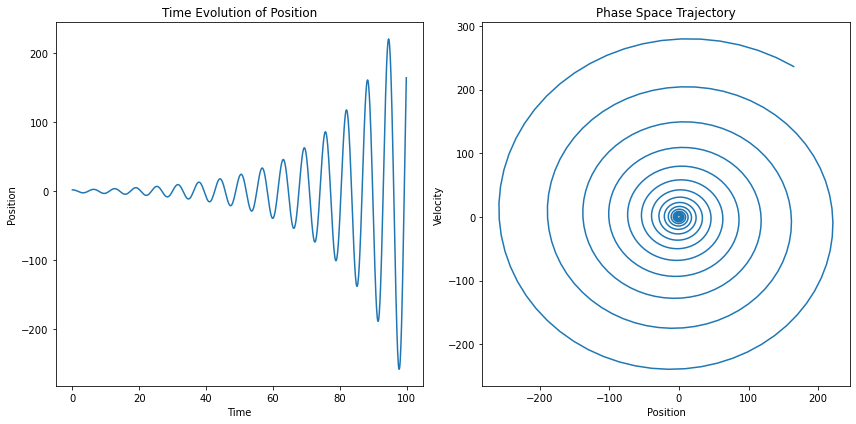

In [15]:
euler_times, euler_positions, euler_velocities = evolution(k, m, dt, x0, v0, T, algo='euler', plot=True)

**前向Euler方法可能导致所模拟系统的能量逐渐增加**。因为在每一步积分中，由于一阶近似的误差，系统的动能和势能会被高估。这就像在每一步都向系统“注入”了一点额外的能量。这种现象在数值模拟领域常被称为**过热**。

因此在需要长时间模拟，或者对模拟精度要求较高的场合，通常会使用更高阶，或者保守能量的积分方法，例如Verlet积分算法等满足辛结构的方法。

## 3.3 Position Verlet算法

Position Verlet算法（也称Verlet积分）在计算物理学中常用于解决**牛顿运动方程的数值积分**。它由法国物理学家Loup Verlet提出，用于模拟分子动力学系统。

基本的Verlet积分算法使用当前和前一个时间步长的位置信息来计算下一个时间步长的位置，同时保证能量守恒。这使得它在模拟许多物理系统，尤其是分子动力学模拟中非常实用，因为这种模拟通常需要长时间保持精度。Position verlet算法通过以下方式进行更新：

$$r(t+\Delta t)=2r(t)-r(t-\Delta t)+a\Delta t^2+O(\Delta t^4)$$

$$v(t)=\frac{r(t+\Delta t)-r(t-\Delta t)}{2\Delta t}+O(\Delta t^2)$$

特别注意，**Verlet不是一个自启动算法**。第一步需要根据初始的速度，反推前一步的位置。只有同时具备当前步和前一步的位置信息，Verlet算法才能够更新迭代获得下一步的位置信息。

算法示意图如下：

![alt](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/16392/4ba9e9992bba49b583a54207d22c1592/c118304d-b60e-47ce-9be5-490e6f230377.png)

### `class VerletIntegrator`

In [16]:
class VerletIntegrator:
    def __init__(self, dt):
        self.dt = dt
        self.previous_x = None

    def step(self, system, x, v0=None):
        '''
        Perform verlet integration on a system, stores x as previous_x and returns the new_x

        Args:
          system (class): simulation system class, should provide acceleration() method
          x (float): current position
          v0 (float): initial velocity

        Returns:
          new_x: float
              the position at the next time step
          current_v : float
              the velocity at the current time step

        '''
        if self.previous_x is None:
            """
            On the first step, we can't do a full Verlet update because we
            don't have a previous_x. Instead, we estimate previous_x using a
            first-order Taylor expansion, taking into account initial velocity
            """
            self.previous_x = x - v0*self.dt + 0.5*system.acceleration(x) * self.dt ** 2

        # Calculate new position using Verlet algorithm
        a = system.acceleration(x)
        new_x = 2*x - self.previous_x + a * self.dt ** 2

        # Calculate the velocity for the current position
        if self.previous_x is not None:
            current_v = (new_x - self.previous_x) / (2*self.dt)
        else:
            current_v = v0

        # Update previous_x for the next step
        self.previous_x = x

        return new_x, current_v

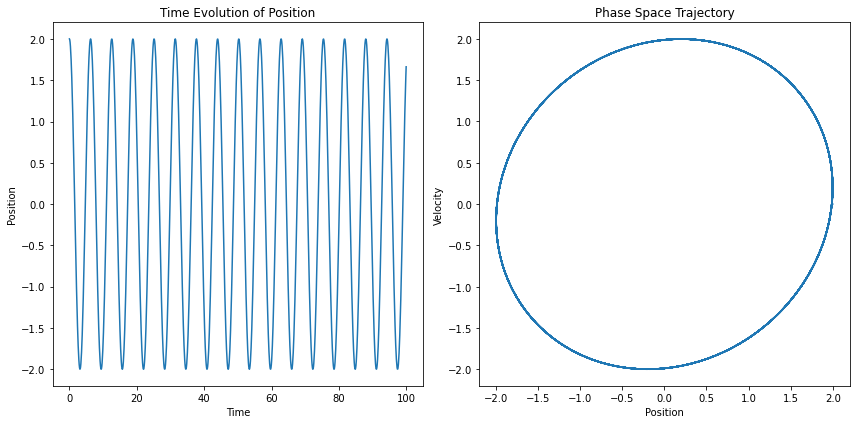

In [17]:
pv_times, pv_positions, pv_velocities = evolution(k, m, dt, x0, v0, T, algo='position verlet', plot=True)

积分步长$\Delta t=0.01$时，Verlet算法表现出了很好的稳定性，能够很好地维持正弦或余弦函数的振荡模式，并且振幅随时间保持恒定。同时，$r(t)\sim v(t)$图形成了一个封闭的圆环，这与理论上一维谐振子的相空间区域完全吻合，说明Verlet算法能够很好地保持系统动力学的守恒性质。

## 3.4 Velocity Verlet算法

Velocity Verlet算法是基于Verlet算法的一个变种，相较于原始的Verlet算法，Velocity Verlet算法在每一步的计算中显式地包含了**速度**。

**基本思路**：

首先根据当前位置和速度计算出下一时刻的位置，然后再根据新的位置计算出下一时刻的加速度，最后再用新的加速度和旧的加速度的平均值来更新速度。

Velocity Verlet算法的一个重要特性是它满足辛结构，这意味着它在积分过程中保守了哈密顿系统的相应结构，使得在长时间的积分过程中，系统的能量得以良好保持。这是在分子动力学模拟等需要精确模拟物理系统动力学的场合中，Velocity Verlet算法被广泛使用的原因。

Velocity Verlet算法通过以下方式进行更新：


$$
\begin{gather}
v(t + \frac{dt}{2}) = v(t) + \frac12 * a(t) * dt \\

x(t + dt) = x(t) + v(t + \frac{dt}{2}) * dt \\

a(t + dt) \quad from \quad x(t+dt) \\

v(t + dt) = v(t + \frac{dt}{2}) + \frac12 * a(t + dt) * dt \\
\end{gather}
$$

算法示意图如下：

![alt](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/16392/4ba9e9992bba49b583a54207d22c1592/23d29ae6-160f-418d-8dc6-7f9888a168a0.png)

### `class VelocityVerletIntegrator`

In [18]:
class VelocityVerletIntegrator:
    """
    A numerical integrator using the Velocity Verlet method.
    """

    def __init__(self, dt):
        """
        Initialize the integrator.

        Parameters:
        dt : float
            Time step for the numerical integration.
        """
        self.dt = dt

    def step(self, system, x, v):
        """
        Perform one integration step.

        Parameters:
        system : object
            The physical system to be integrated. It should have a method `acceleration(x)` that computes the acceleration.
        x : float
            Current position.
        v : float
            Current velocity.

        Returns:
        float, float
            Updated position and velocity.
        """
        a = system.acceleration(x)
        x_new = x + self.dt * v + 0.5 * self.dt**2 * a
        a_new = system.acceleration(x_new)
        v_new = v + 0.5 * self.dt * (a + a_new)

        return x_new, v_new

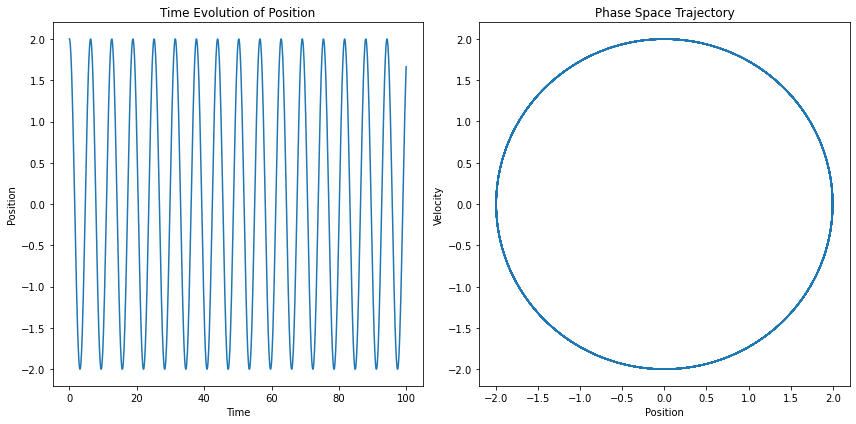

In [19]:
vv_times, vv_positions, vv_velocities = evolution(k, m, dt, x0, v0, T, algo='velocity verlet', plot=True)

当积分步长$\Delta t=0.01$时，Velocity Verlet算法表现出了很好的稳定性，能够很好地维持正弦或余弦函数的振荡模式，并且振幅随时间保持恒定。同时，$r(t)\sim v(t)$图形成了一个封闭的圆环，这与理论上一维谐振子的相空间区域完全吻合，说明Velocity Verlet算法能够很好地保持系统动力学的守恒性质。

## 3.5 Leapfrog算法

Leapfrog积分是一种常见的用于求解二阶常微分方程的数值方法，特别适用于物理系统的模拟，如分子动力学和天体力学。Leapfrog积分算法的名字来源于其更新位置和速度的方式，这两个变量在时间步上像青蛙跳跃般交错，即在相同的时间步，位置和速度的更新是分开的，这也是Leapfrog算法的一个显著特点。

- **优点**

  **精度高，稳定性好**。Leapfrog算法是一个对称的、可逆的算法，这种性质使得在进行物理模拟时，它能很好的保持系统的能量守恒。

- **缺点**

  对于某些问题，比如处理粘性力或者摩擦力的问题，可能会有一些困难。


Leapfrog算法通过以下方式进行更新：


$$
\begin{align}
r(t + dt) = r(t) + v(t+\frac{dt}2)*dt \\
v(t + \frac{dt}2) = v(t-\frac{dt}2) + \frac{F(t)}{m} * dt
\end{align}
$$


算法示意图如下：

![alt](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/16392/f46364ddc3cc4372af431f3a43b56cb8/b513d680-3084-4cef-84fa-b70dc56b4a00.png)

### `class LeapfrogIntegrator`

In [20]:
class LeapfrogIntegrator:
    """
    LeapfrogIntegrator is a class for the Leapfrog integration method.

    Attributes:
        dt: The timestep for integration.

    Methods:
        step(system, x, v): Perform one step of Leapfrog integration.
    """
    def __init__(self, dt):
        self.dt = dt

    def step(self, system, x, v):
        """
        Parameters:
        x : float
            current position
        v : float
            velocity at current minus half timestep

        Returns:
        x_next : float
            position at next time step
        v_next : float
            velocity at next half timestep
        """
        a = system.acceleration(x)
        v_next = v + self.dt * a
        x_next = x + self.dt * v_next
        return x_next, v_next

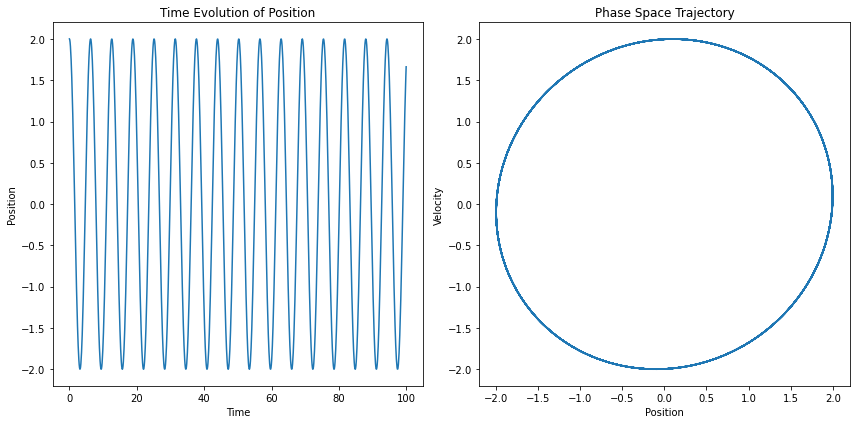

In [21]:
lf_times, lf_positions, lf_velocities = evolution(k, m, dt, x0, v0, T, algo='leapfrog', plot=True)

## 3.6 误差积累

Verlet算法的优点是它的简洁性和长时间的稳定性，尤其是在模拟具有周期性边界条件的大型系统时。然而，尽管Verlet算法具有较高的精度，但**在长时间的模拟中，误差仍然可能会累积。**

### 3.6.1 算法**误差来源**：

1. **截断误差**：**忽略高阶项引起的误差**。在Verlet积分算法中，对于物体的加速度只保留了力的二阶泰勒展开，这种误差通常与时间步长的平方成正比。

2. **舍入误差**：**计算机浮点运算引起的误差**。在计算的每一步中，都可能引入微小的舍入误差。由于Verlet算法的递归性，这些小的误差可能会随着时间的推移而累积，从而影响结果的精度。

通常，为了减小这些误差，可以选择较小的时间步长，并确保对力的计算尽可能精确。然而，值得注意的是，选择过小的时间步长会导致计算成本增加，并可能增加舍入误差。**因此，在实践中，需要找到一个平衡，使得时间步长足够小以提供所需的精度，同时又足够大以避免不必要的计算成本和舍入误差。**

In [22]:
def compare_solutions(oscillator, integrator, x0, v0, T, dt):
    """
    Compare the numerical integration to the analytical solution.

    Parameters:
    oscillator : HarmonicOscillator
        The HarmonicOscillator system.
    integrator : VerletIntegrator
        The VerletIntegrator used for numerical integration.
    x0 : float
        Initial position.
    v0 : float
        Initial velocity.
    T : float
        Total time for the simulation.
    dt : float
        Time step for the numerical integration.

    Returns:
    None
    """
    times = np.arange(0, T, dt)
    num_positions = []
    num_velocities = []
    ana_positions = []
    ana_velocities = []

    x = x0
    v = v0
    for t in times:
        # Numerical solution
        num_positions.append(x)
        x, v = integrator.step(oscillator, x, v)
        num_velocities.append(v)

        # Analytical solution
        x_ana, v_ana = oscillator.analytical_solution(x0, v0, t)
        ana_positions.append(x_ana)
        ana_velocities.append(v_ana)

    # Calculate differences
    diff_positions = np.array(num_positions) - np.array(ana_positions)
    diff_velocities = np.array(num_velocities) - np.array(ana_velocities)
    return times, diff_positions, diff_velocities


def plot_differences(times, diff_positions, diff_velocities):
    """
    Plot the differences in position and velocity.

    Parameters:
    times : array
        Array of time points.
    diff_positions : array
        Array of absolute differences in position.
    diff_velocities : array
        Array of absolute differences in velocity.

    Returns:
    None
    """
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.plot(times, diff_positions)
    plt.xlabel('Time')
    plt.ylabel('Absolute difference in position')
    plt.title('Position Difference: Numerical vs Analytical')

    plt.subplot(122)
    plt.plot(times, diff_velocities)
    plt.xlabel('Time')
    plt.ylabel('Absolute difference in velocity')
    plt.title('Velocity Difference: Numerical vs Analytical')

    plt.tight_layout()
    plt.show()

### 3.6.2 误差随时间步$t$的积累变化

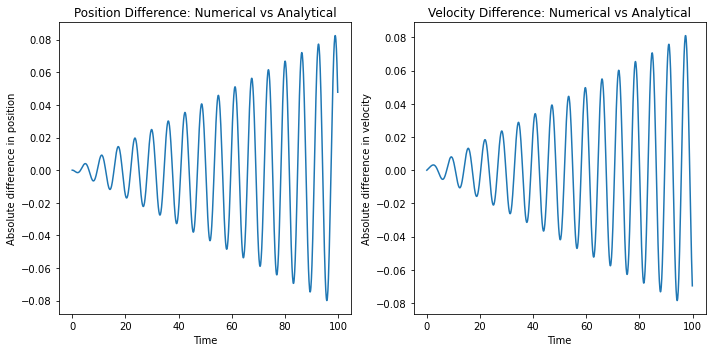


------------------------------------------------------------

Position ERROR = 0.08243918346928533
Velocity ERROR = 0.08109752016084568






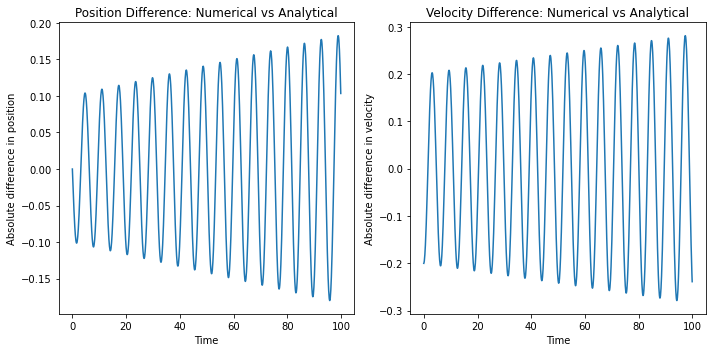


------------------------------------------------------------

Position ERROR = 0.18254650982602277
Velocity ERROR = 0.28110370374382565


In [23]:
oscillator = HarmonicOscillator(k, m)

verlet = VerletIntegrator(dt)
leapfrog = LeapfrogIntegrator(dt)

pv_times, pv_diff_positions, pv_diff_velocities = compare_solutions(oscillator, verlet, x0, v0, T, dt)
lf_times, lf_diff_positions, lf_diff_velocities = compare_solutions(oscillator, leapfrog, x0, v0, T, dt)

plot_differences(pv_times, pv_diff_positions, pv_diff_velocities)
print("\n------------------------------------------------------------\n")
print('Position ERROR =', max(pv_diff_positions))
print('Velocity ERROR =', max(pv_diff_velocities))
print("\n\n========================================================================================================================\n\n")
plot_differences(lf_times, lf_diff_positions, lf_diff_velocities)
print("\n------------------------------------------------------------\n")
print('Position ERROR =', max(lf_diff_positions))
print('Velocity ERROR =', max(lf_diff_velocities))

### 3.6.3 误差随积分步长$dt$的变化

Position ERROR: [0.0008247177235391305, 0.0032988140313538576, 0.007422990400663566, 0.013196953657699392, 0.02062003286568534, 0.02969134327164059, 0.040420315836705835, 0.05281068149675166]
Velocity ERROR: [0.0008117508459143871, 0.003246930072741412, 0.007305314646839594, 0.012988369042770405, 0.02029320465320189, 0.029220797986574627, 0.03977829141765156, 0.051959749379682514]


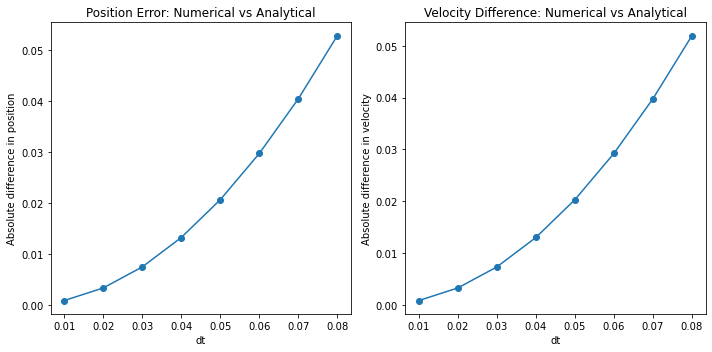

In [24]:
oscillator = HarmonicOscillator(k, m)

stepSize = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
err_pos = []
err_vel = []

# Compare solutions
for dt in stepSize:
    integrator = VerletIntegrator(dt)
    times, diff_positions, diff_velocities = compare_solutions(oscillator, integrator, x0, v0, T, dt)
    err_pos.append(max(diff_positions))
    err_vel.append(max(diff_velocities))

print('Position ERROR:',err_pos)
print('Velocity ERROR:',err_vel)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(stepSize, err_pos, 'o-')
plt.xlabel('dt')
plt.ylabel('Absolute difference in position')
plt.title('Position Error: Numerical vs Analytical')

plt.subplot(122)
plt.plot(stepSize, err_vel, 'o-')
plt.xlabel('dt')
plt.ylabel('Absolute difference in velocity')
plt.title('Velocity Difference: Numerical vs Analytical')

plt.tight_layout()
plt.show()

误差积累随$dt$呈抛物线二阶增长。